In [61]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [62]:
train_df = pd.read_csv('F:\\train.csv')
test_df = pd.read_csv('F:\\test.csv')

In [63]:
print('Shape of train dataset:',train_df.shape)
print('Shape of test dataset:',test_df.shape)

Shape of train dataset: (1460, 81)
Shape of test dataset: (1459, 80)


In [64]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [66]:
#Data Exploration includes univariate analysis, bivariate analysis, multivariate analysis, and crosstables

In [67]:
train_df.columns[train_df.isnull().any()]#the below features contain missing values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [68]:
print(len(train_df.columns))
print(len(train_df.columns[train_df.isnull().any()]))

#Out of 81 columns, 19 columns have missing values

81
19


In [69]:
miss = (train_df.isnull().sum()/len(train_df))*100
miss = miss[miss>0]
miss.sort_values(inplace=True, ascending=False)
miss

#Clearly, PoolQC followed by, MiscFeature, Alley, Fence have maximum percentage of missing values

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

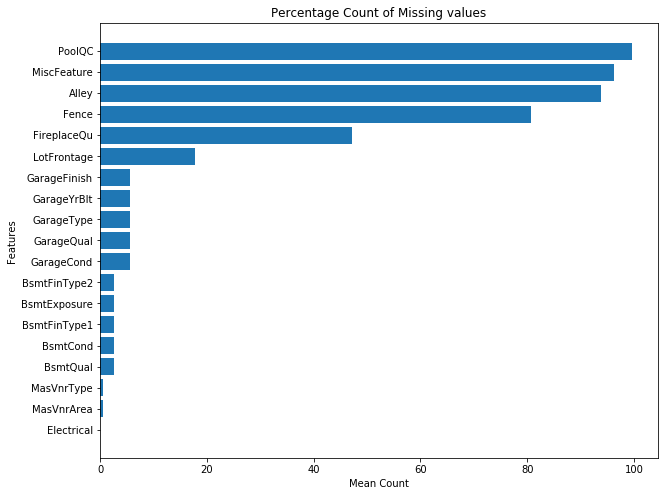

In [70]:
miss= pd.DataFrame(miss, columns= ['PercentageCount'])
miss['Name'] = miss.index
miss.sort_values(by='PercentageCount', inplace = True)
plt.barh(miss.Name, miss.PercentageCount)
plt.xlabel('Mean Count')
plt.ylabel('Features')
plt.title('Percentage Count of Missing values')
plt.show()

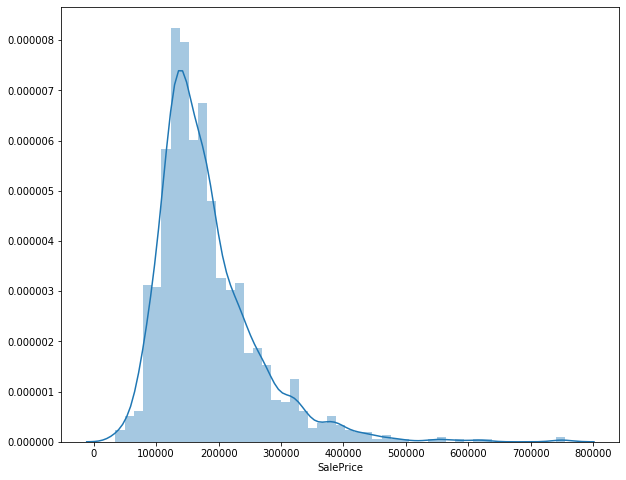

In [71]:
#Check the distribution of the sales price(target variable)
sns.distplot(train_df['SalePrice'])

In [72]:
print("Skewness of SalePrice is:",train_df['SalePrice'].skew())
#we can see the SalePrice is right skewed. We need to remove the skew and log transform so that the variable is normally distributed. A normally distributed target variable helps in better modelling the relationship between target and independent variable

Skewness of SalePrice is: 1.8828757597682129


Skewness, after log transform is: 0.12133506220520406


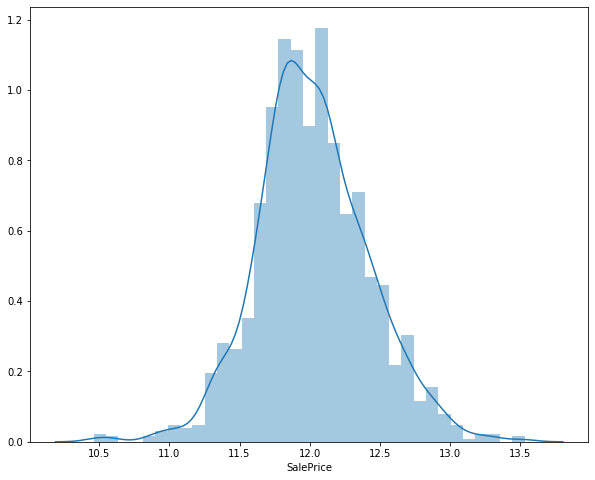

In [73]:
#We will log transform to see if the variable can get any close to normal
target = np.log(train_df['SalePrice'])
print('Skewness, after log transform is:', target.skew())
sns.distplot(target)

#Now the distribution looks close to normal

In [74]:
#Now, since we have 80 variables, we will find the coorelation of each variable with the target variable. We will seperate numeric and categorical variable
num_data = train_df.select_dtypes(include=[np.number])
cat_data = train_df.select_dtypes(exclude=[np.number])
print('Columns in Numeric data:', num_data.shape[1])
print('Columns in Categrical data:', cat_data.shape[1])

Columns in Numeric data: 38
Columns in Categrical data: 43


In [75]:
num_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [76]:
cat_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [77]:
del num_data['Id']

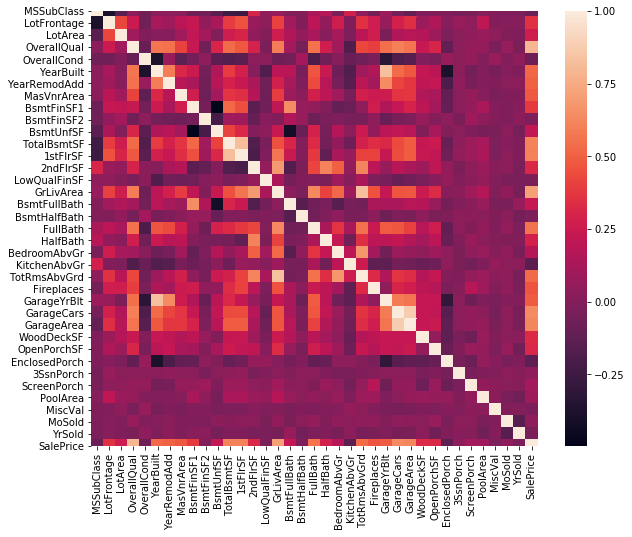

In [78]:
corr = num_data.corr()
sns.heatmap(corr)

In [79]:
corr['SalePrice'].sort_values(ascending=False)[:15]

#Here, we see, Overallqual is 79% correlated to the SalePrice , which refers to the the overall quality and materials of 
#the completed house, which makes total sense
#GrLivArea is 70% correlated, which refers to the living area above ground. People also care about if the house has a garage, 
#area of the garage, size of the basement area,etc

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

In [80]:
corr['SalePrice'].sort_values(ascending=False)[-5:]

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [81]:
#OverallQual
train_df['OverallQual'].unique()#So the Overall quality is measured on a scale of 1 to 10. We can treat this variable as ordinal variable

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [82]:
#Let's check the mean sale price per quality
#We are using median because the target variable is skewed. A skewed variable has outliers and median is robust to outliers
pivot = train_df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot.sort_values(by='OverallQual')

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


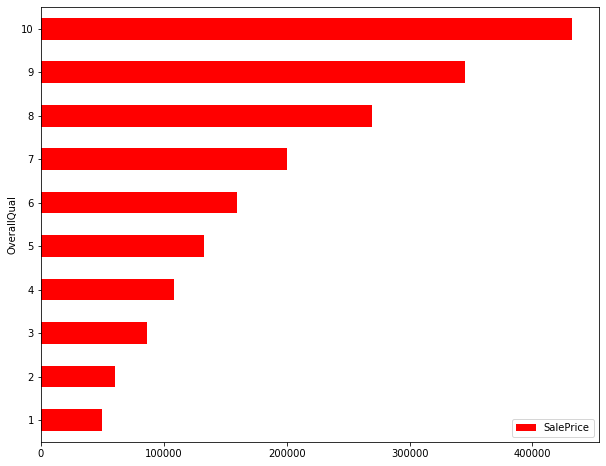

In [83]:
pivot.plot(kind='barh', color='red') #The behaviour of the plot is quiet normal. As the overall quality of a house increases, its sale price also increases.

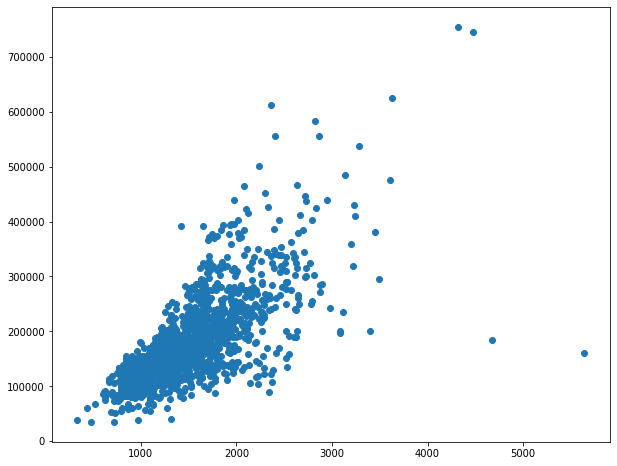

In [84]:
#GrLivArea
plt.scatter(train_df.GrLivArea, train_df.SalePrice)
#We see a direct correlation between these 2 features. Also, for GrLivArea>4000, we can find some outliers, which can spoil the model performance

Car Capacity of a garage: [2 3 1 0 4]


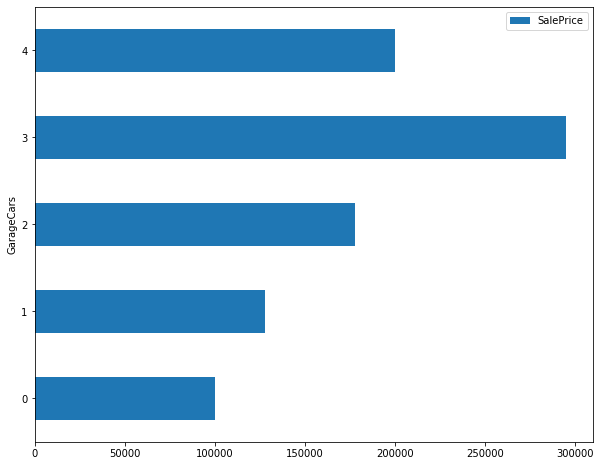

In [85]:
#GarageCars
print('Car Capacity of a garage:',train_df.GarageCars.unique())
pivot1 = train_df.pivot_table(index='GarageCars', values='SalePrice', aggfunc=np.median)
pivot1.sort_values(by='GarageCars', inplace = True)
pivot1.plot(kind='barh')

#Garages with 3 Cars capacity has the highest sales price

In [86]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [87]:
#SaleCondition 
train_df.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

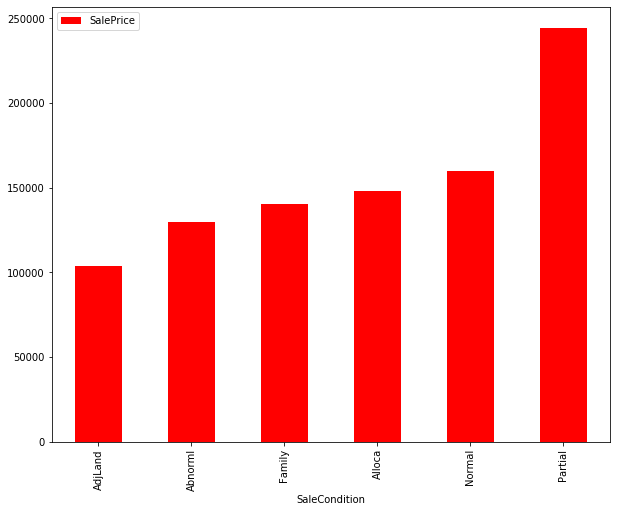

In [88]:
pivot2 = train_df.pivot_table(index = 'SaleCondition', values = 'SalePrice', aggfunc = np.median)
pivot2.sort_values(by = 'SalePrice', inplace = True)
pivot2.plot(kind = 'bar', color = 'red')

# We see, the partial sale condition has the highest sale price, but we cannot deduce anything of this. Lack of information

In [89]:
#Like Coorelation, we will perform ANOVA test for all the categorical varibales


# ANOVA test is a statistical technique used to determine if there exists a significant difference in the mean of groups. 
# For example, let's say we have two variables A and B. Each of these variables has 3 levels (a1,a2,a3 and b1,b2,b3). 
# If the mean of these levels with respect to the target variable is the same, the ANOVA test will capture this behavior and 
# we can safely remove them.

# While using ANOVA, our hypothesis is as follows:
# Ho - There exists no significant difference between the groups. 
# Ha - There exists a significant difference between the groups.

In [102]:
cat = cat_data.columns
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

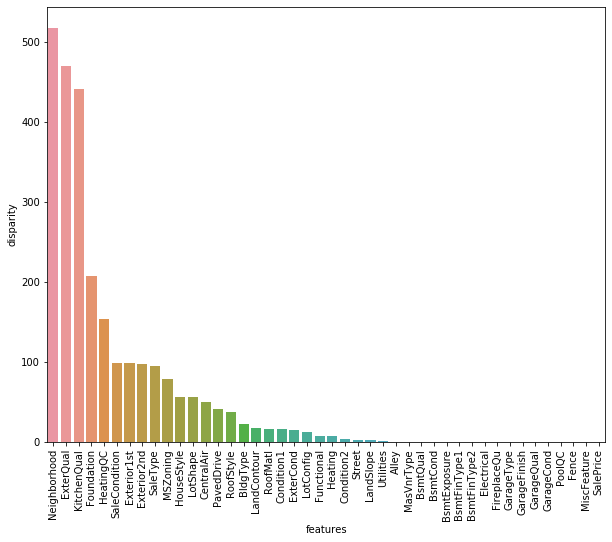

In [103]:
cat_data['SalePrice'] = train_df.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt.show()

#We see, Neighboorhood holds great importance. ExterQual, KitchenQual are also considered

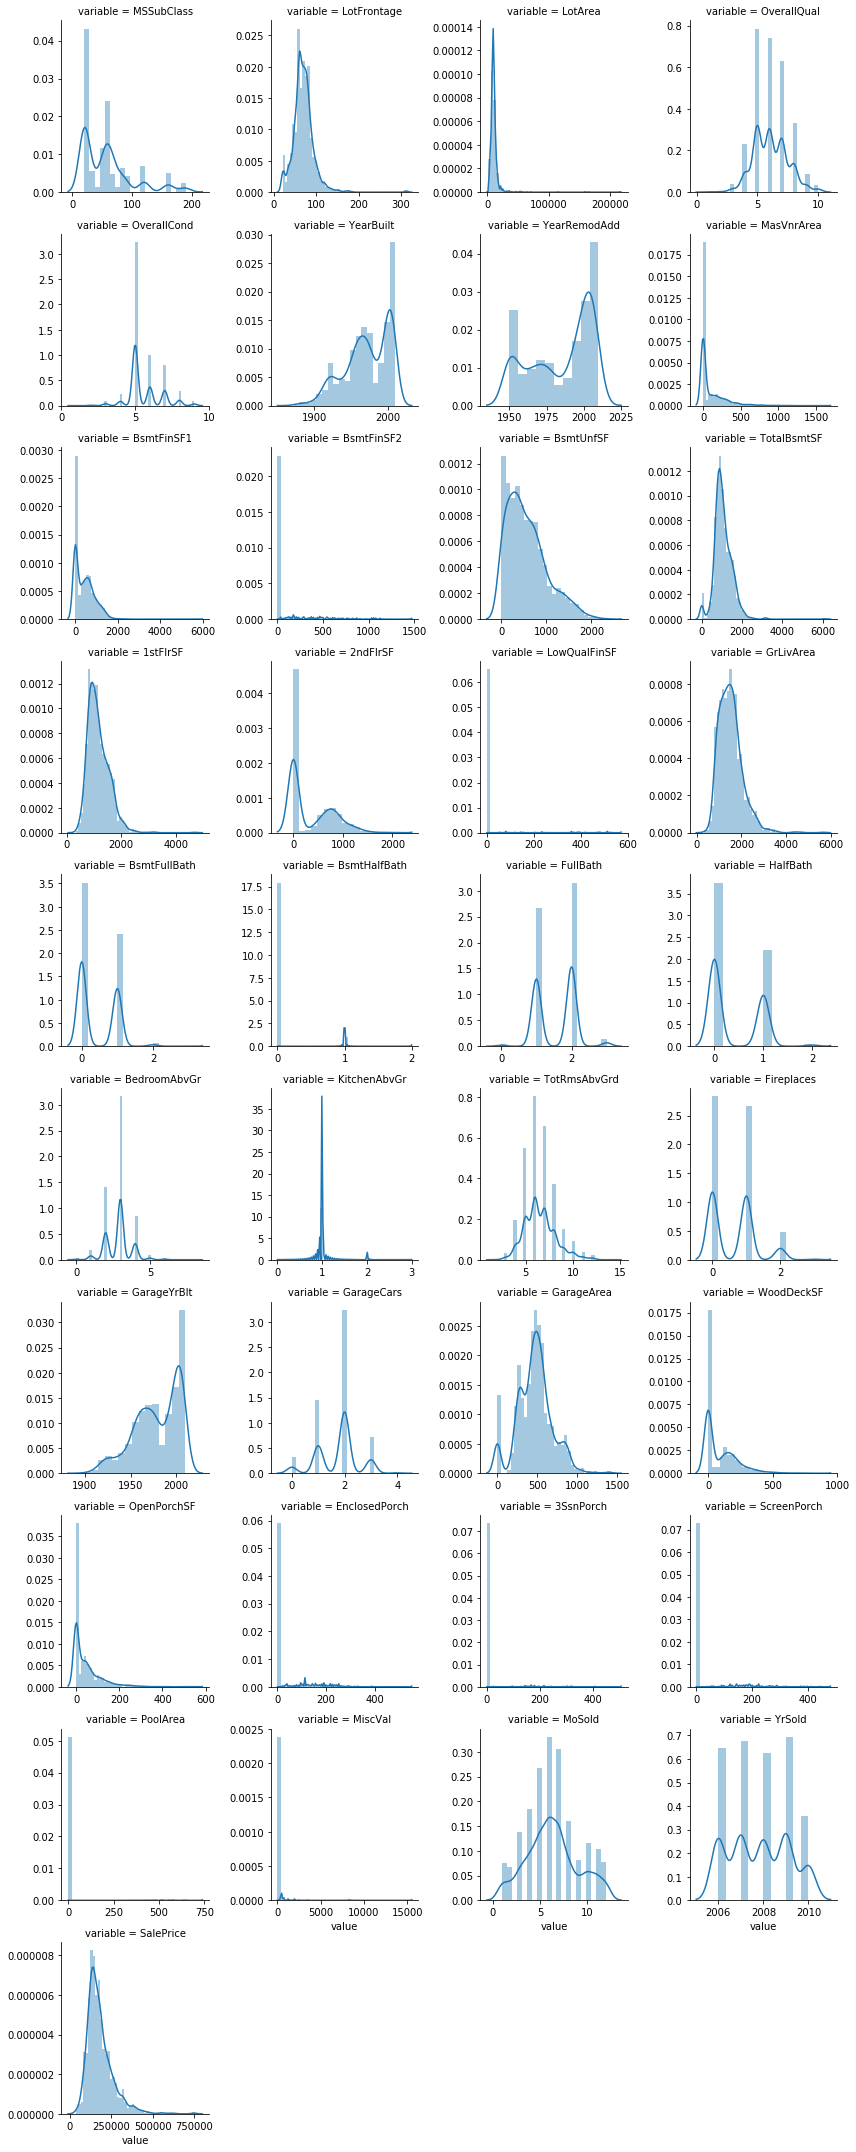

In [104]:
#Now we will create histograms for all the numeric data, to determine their skewness

nd = pd.melt(train_df, value_vars = num_data.columns)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')

#Most of the variables are right skewed, which needs to be transformed

In [107]:
#Let's visualize categorical data using box plot
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x = plt.xticks(rotation=90)

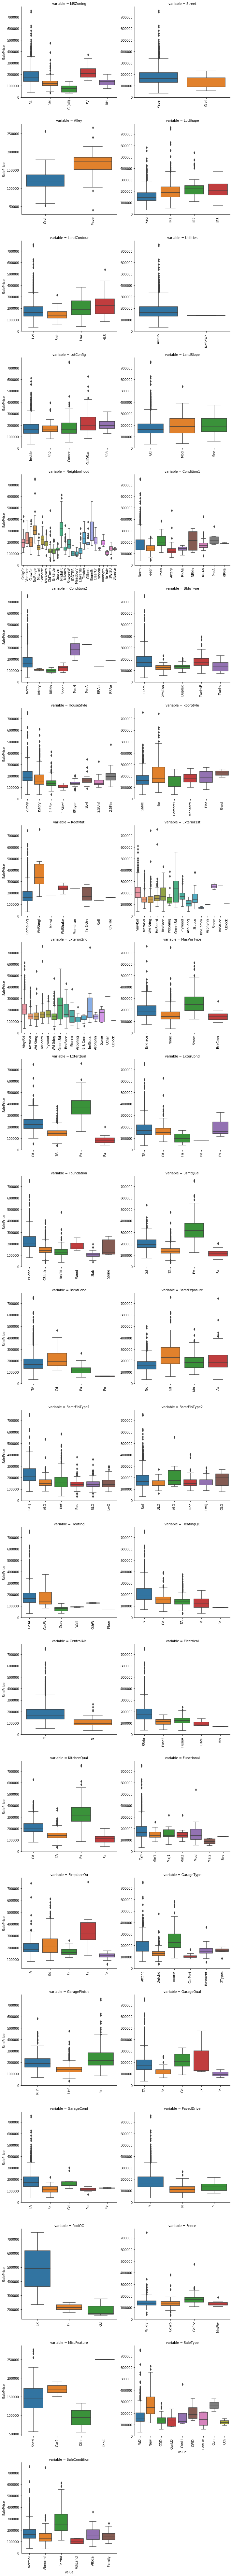

In [122]:
cat = [f for f in train_df.columns if train_df.dtypes[f] == 'object']
cd = pd.melt(train_df, id_vars = 'SalePrice', value_vars=cat)
g = sns.FacetGrid (cd, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')

# Most of our variables have outliers. It will take a lot of time if we start treating each outlier. 
# So we will allow our algorithm handle it. Tree Based algorithms are robut to outliers